In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img=cv2.imread('./test/tomcruise.jpeg')
img.shape

(452, 678, 3)

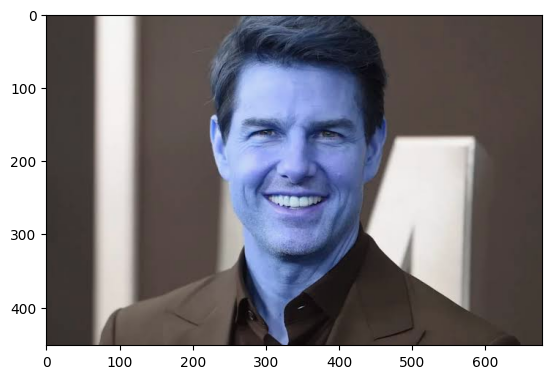

In [4]:
plt.imshow(img)

(452, 678)


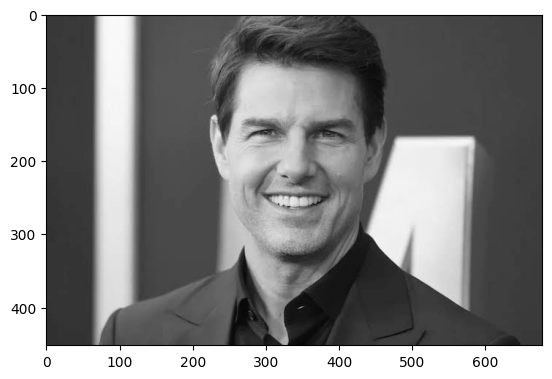

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray,cmap='gray')

### haar cascade use to  detect eyes ###

In [6]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[228,  75, 230, 230]])

In [7]:
(x,y,w,h)=faces[0]
x,y,w,h

(228, 75, 230, 230)

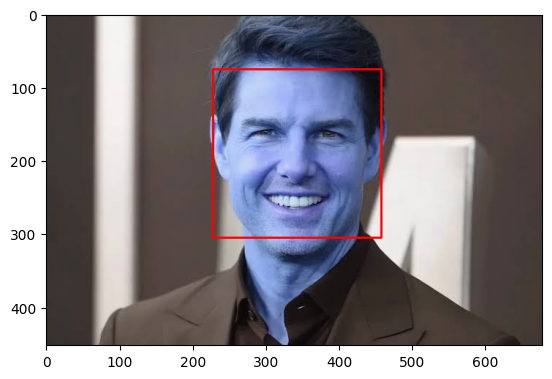

In [8]:
face_image=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_image)

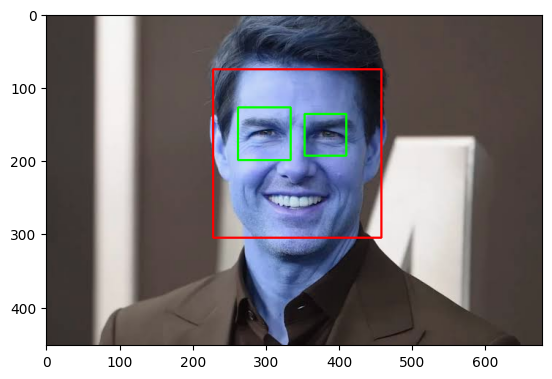

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

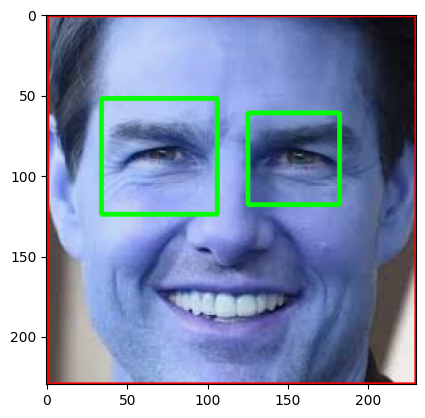

In [10]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color


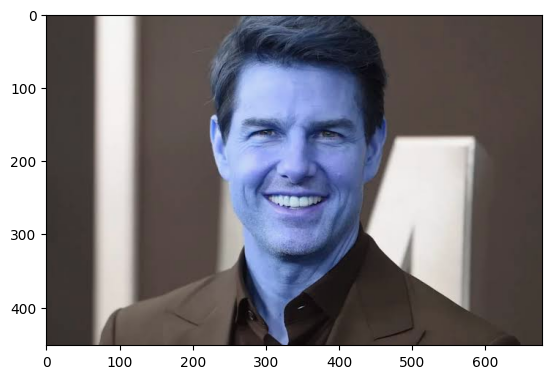

In [12]:
original_image=cv2.imread('./test/tomcruise.jpeg')
plt.imshow(original_image)

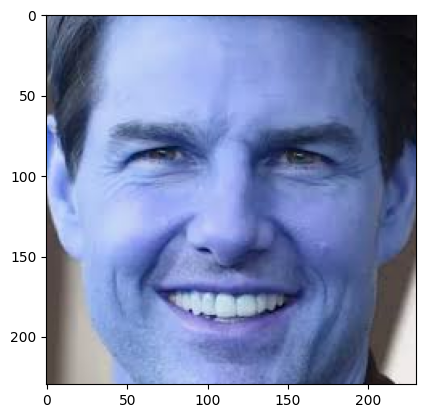

In [13]:
cropped_image=get_cropped_image_if_2_eyes('./test/tomcruise.jpeg')
plt.imshow(cropped_image)

In [23]:
path_to_data="./dataset/"
path_to_cropped_data="./dataset/cropped/"

In [24]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [25]:
img_dirs

['./dataset/Angelina_Jolie',
 './dataset/Robert_Downey_Jr',
 './dataset/Scarlett_Johansson',
 './dataset/Tom_Cruise']

In [26]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [27]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name]=[]

    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cropped_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder:",cropped_folder)
            
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1



Angelina_Jolie
generating cropped images in folder: ./dataset/cropped/Angelina_Jolie
Robert_Downey_Jr
generating cropped images in folder: ./dataset/cropped/Robert_Downey_Jr
Scarlett_Johansson
generating cropped images in folder: ./dataset/cropped/Scarlett_Johansson
Tom_Cruise
generating cropped images in folder: ./dataset/cropped/Tom_Cruise


In [28]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray /=255;

    coeffs=pywt.wavedec2(imArray,mode,level=level)

    #proecess_coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H *=255;
    imArray_H=np.uint8(imArray_H)

    return imArray_H

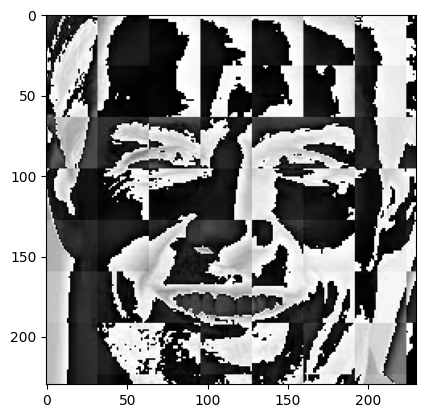

In [29]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [30]:
celebrity_file_names_dict

{'Angelina_Jolie': ['./dataset/cropped/Angelina_Jolie/Angelina_Jolie1.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie2.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie3.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie4.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie5.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie6.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie7.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie8.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie9.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie10.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie11.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie12.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie13.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie14.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie15.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jolie16.png',
  './dataset/cropped/Angelina_Jolie/Angelina_Jo

In [31]:
#give numerical representation to starts names
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] =count
    count=count+1
class_dict

{'Angelina_Jolie': 0,
 'Robert_Downey_Jr': 1,
 'Scarlett_Johansson': 2,
 'Tom_Cruise': 3}

In [32]:
X,y=[],[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [33]:
len(X[0])

4096

In [34]:
X[0]

array([[249],
       [228],
       [226],
       ...,
       [  3],
       [243],
       [227]], dtype=uint8)

In [35]:
y[1]

0

In [36]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(378, 4096)

## train ##

### train with support vector machines ###

In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8315789473684211

In [41]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.69      0.75      0.72        12
           2       0.83      0.93      0.88        43
           3       0.88      0.54      0.67        13

    accuracy                           0.83        95
   macro avg       0.82      0.77      0.78        95
weighted avg       0.84      0.83      0.83        95



### Grid search to find what is the best model ###

In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [44]:
scores=[]
best_estimator={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimator[algo]=clf.best_estimator_

df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.830263,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.597306,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.847932,{'logisticregression__C': 1}


In [46]:
best_estimator

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [55]:
best_estimator['svm'].score(X_test,y_test)

0.8526315789473684

In [56]:
best_estimator['logistic_regression'].score(X_test,y_test)

In [57]:
best_clf=best_estimator['logistic_regression']

In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[24,  2,  1,  0],
       [ 1, 11,  0,  0],
       [ 3,  0, 40,  0],
       [ 0,  1,  1, 11]], dtype=int64)

### save trained model ###

Text(95.72222222222221, 0.5, 'Truth')

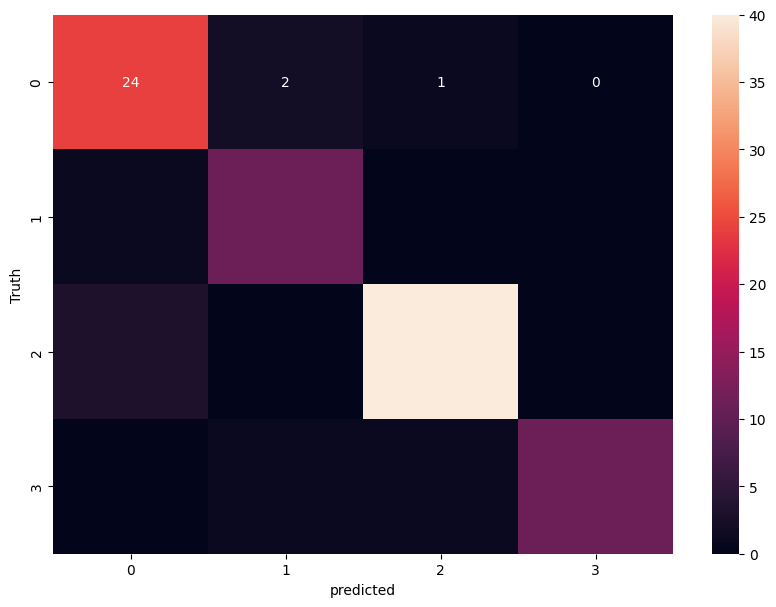

In [60]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [61]:
import joblib 
joblib.dump(best_clf,'classification_model.pkl')


['classification_model.pkl']

#### save class dictionary ###

In [62]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))